## Lab 3: Hill Climbing

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

#### Encode the problem
* Each item is encoded with its: ( _benefit_, _volume_ )
* `CAPACITY` of the knapsack can be adjusted.
* `NUM_GENES` is the number of genes each individual has.

In [5]:
items = np.array([(5,3), (6,2), (1,4), (9,5), (2,8), (8,9), (4,10), (3,1), (7,6), (10,7)])
CAPACITY = 20
NUM_GENES = len(items)

#### Random Individual
* Generates a random individual with `length=10` number of genes.

In [6]:
def random_individual(length=NUM_GENES):
    return np.random.randint(low = 0, high = 2, size = length)
    
indiv1 = random_individual()

#### Random Population
* Generates a population with `population_size` number of individuals.
* Each individual will have `length` number of genes.

In [7]:
def random_population(population_size=100, length=10):
    return [random_individual(length) for i in range(population_size)]

POPULATION_SIZE = 8
random_population(POPULATION_SIZE, NUM_GENES);

#### Evaluate Individual
* Given an individual, returns the total benefit and total volume.

In [8]:
def evaluate_individual(individual):
    total_benefit = sum(individual * items[:, 0])
    total_volume = sum(individual * items[:, 1])
    return total_benefit, total_volume

evaluate_individual(indiv1)

(23, 35)

#### Mutate
* Given an individual, flip a random gene.

In [9]:
def mutate(individual):
    individual = deepcopy(individual)
    index = random.randint(0,len(individual)-1)
    if individual[index] == 0:
        individual[index] = 1
    else:
        individual[index] = 0
    return individual
        
print(indiv1)
indiv2 = mutate(indiv1)
print(indiv1)
print(indiv2)

[1 0 1 0 1 1 1 1 0 0]
[1 0 1 0 1 1 1 1 0 0]
[1 0 0 0 1 1 1 1 0 0]


#### Mutate Population
* Given a population, mutate all individuals. Return a new population.
* Don't modify the original population.

In [10]:
def mutate_population(population):
    new_population = []
    for individual in population:
        new_population.append(mutate(individual))
    return new_population

population1 = random_population(POPULATION_SIZE, NUM_GENES);
print("Population 1 (before mutation): ", population1[0])

population2 = mutate_population(population1)
print("Population 1 (after mutation):  ", population1[0])
print("Population 2 :", population2[0])

Population 1 (before mutation):  [1 1 0 0 0 1 1 1 0 0]
Population 1 (after mutation):   [1 1 0 0 0 1 1 1 0 0]
Population 2 : [1 1 1 0 0 1 1 1 0 0]


#### Fitness
* Given an individual, evaluate its fitness.

In [11]:
def fitness(individual):
    benefit, volume = evaluate_individual(individual)
    if volume > 20:
        fitness = benefit - (4)*abs(volume - CAPACITY)
    else:    
        fitness =  benefit - abs(volume - CAPACITY)
    return fitness

indiv1 = random_individual(NUM_GENES)
fitness(indiv1)

-14

### Random Search
* Generate individuals randomly, return the one with the highest fitness.
* Just a Baseline model

In [12]:
def random_search(epochs = 1000):
    best_solution = None
    best_fitness = 0
    for i in range(epochs):
        indiv_i = random_individual()
        fitness_i = fitness(indiv_i)
        if fitness_i > best_fitness:
            best_fitness, best_solution = fitness_i, indiv_i
    
    print("Best individual: ", best_solution)
    best_benefit, best_volume = evaluate_individual(best_solution)
    print("Benefit: ", best_benefit)
    print("Volume: ", best_volume)

random_search(10000)

Best individual:  [0 1 0 1 0 0 0 0 1 1]
Benefit:  32
Volume:  20


### Brute Force

The best solution turns out to have:
* **Benefit**: 33
* **Volume**: 18

In [13]:
def brute_force():
    # enumerate all possible solutions
    all_solutions = list(product([0, 1], repeat=10))        

    best_solution = None
    best_benefit = 0
    for solution in all_solutions:
        benefit_i, volume_i = evaluate_individual(solution)
        if volume_i <= CAPACITY:
            if benefit_i > best_benefit:
                best_benefit, best_solution = benefit_i, solution
    
    print("Best individual: ", best_solution)
    best_benefit, best_volume = evaluate_individual(best_solution)
    print("Benefit: ", best_benefit)
    print("Volume: ", best_volume)

In [14]:
brute_force()

NameError: name 'product' is not defined

### Single Hill Climber

Best gene:  [0 0 1 0 0 0 1 0 1 0]
Benefit:  12
Capactiy:  20


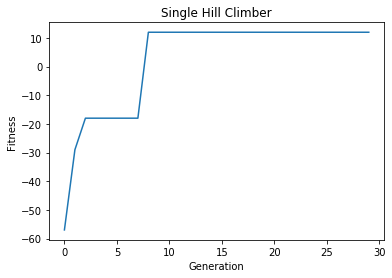

In [15]:
def hill_climber(EPOCH=30):
    individual = random_individual()
    scores = []
    for generation in range(EPOCH):
        
        old_fitness = fitness(individual)
        new_individual = mutate(individual)
        new_fitness = fitness(new_individual)
        
        if new_fitness > old_fitness:
            individual = new_individual
            scores.append(new_fitness)
        else:
            scores.append(old_fitness)
    
    print("Best gene: ", individual)
    benefit, volume = evaluate_individual(individual)
    print("Benefit: ", benefit)
    print("Capactiy: ", volume)
    return scores
        
        
scores = hill_climber()
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Single Hill Climber")
plt.plot(scores);

### Population of Hill Climbers

In [16]:
def flip(individual, index):
    individual = deepcopy(individual)
    if individual[index] == 0:
        individual[index] = 1
    else:
        individual[index] = 0
    return individual

In [17]:
def mutate_matrix(matrix):
    matrix = deepcopy(matrix)
    pop_size = matrix.shape[0]
    
    random_indices = np.random.randint(low = 0, high = NUM_GENES, size = pop_size)    
    mutated_matrix = np.zeros(matrix.shape)
    
    for i in range(len(matrix)):
        old_individual = matrix[i,:]
        new_individual = flip(old_individual, random_indices[i])
        old_score = fitness(old_individual)
        new_score = fitness(new_individual)
        
        if old_score > new_score:
            mutated_matrix[i,:] = old_individual
        else:
            mutated_matrix[i,:] = new_individual
        
    return mutated_matrix

In [18]:
def matrix_to_scores(matrix):
    matrix = deepcopy(matrix)
    pop_size = matrix.shape[0]
    scores = np.zeros(pop_size)
    for i in range(pop_size):
        scores[i] = fitness(matrix[i,:])
    return scores

[('benefit:', 33.0, ' volume:', 18.0, 'score:', 31.0),
 ('benefit:', 23.0, ' volume:', 22.0, 'score:', 15.0),
 ('benefit:', 33.0, ' volume:', 18.0, 'score:', 31.0),
 ('benefit:', 30.0, ' volume:', 17.0, 'score:', 27.0),
 ('benefit:', 31.0, ' volume:', 21.0, 'score:', 27.0),
 ('benefit:', 27.0, ' volume:', 21.0, 'score:', 23.0),
 ('benefit:', 23.0, ' volume:', 20.0, 'score:', 23.0),
 ('benefit:', 28.0, ' volume:', 20.0, 'score:', 28.0),
 ('benefit:', 31.0, ' volume:', 20.0, 'score:', 31.0),
 ('benefit:', 26.0, ' volume:', 18.0, 'score:', 24.0),
 ('benefit:', 27.0, ' volume:', 21.0, 'score:', 23.0),
 ('benefit:', 19.0, ' volume:', 20.0, 'score:', 19.0),
 ('benefit:', 23.0, ' volume:', 21.0, 'score:', 19.0),
 ('benefit:', 28.0, ' volume:', 20.0, 'score:', 28.0),
 ('benefit:', 23.0, ' volume:', 20.0, 'score:', 23.0),
 ('benefit:', 27.0, ' volume:', 20.0, 'score:', 27.0),
 ('benefit:', 15.0, ' volume:', 20.0, 'score:', 15.0),
 ('benefit:', 18.0, ' volume:', 21.0, 'score:', 14.0),
 ('benefit

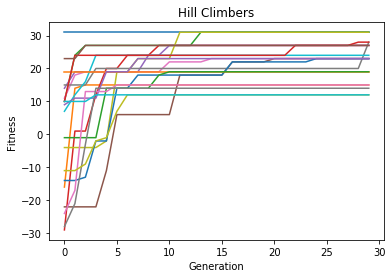

In [29]:
def hill_climbers(population_size=200, EPOCH=50000):
    
    scores = np.zeros((population_size, EPOCH))
    population = np.array(random_population(population_size))
                          
    for epoch in range(EPOCH):
        population = mutate_matrix(population)
        scores_epoch = matrix_to_scores(population)
        scores[:, epoch] = scores_epoch
    
    benefits = []
    for individual in range(population_size):
        benefit, volume = evaluate_individual(population[individual,:])
        benefits.append(("benefit:", benefit, " volume:", volume, "score:", scores[individual, EPOCH-1]))
    
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Hill Climbers")
    plt.plot(np.transpose(scores));
    
    return benefits

hill_climbers(20, 30)